In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create data

nPerClust = 100
blur = 1 # how spread out data are from the cluster mean

# centroids
A = [1, 1]
B = [1, -2]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a, b)).T
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

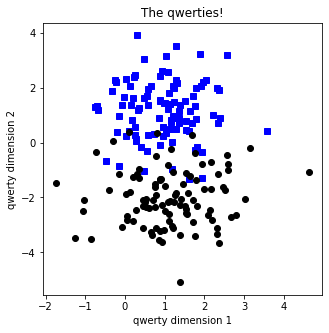

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [11]:
def createANNmodel(learningRate):
    
    # model architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1), # the output of the model is a single value
        nn.Sigmoid()
    )
    
    loss_func = nn.BCELoss() # but better to use BCEWithLogitsLoss
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)
    
    return ANNclassify, loss_func, optimizer

In [12]:
num_epochs = 1000

def train(ANNmodel):
    
    losses = torch.zeros(num_epochs)
    for epoch_i in range(num_epochs):
        y_pred = ANNmodel(data)
        loss = loss_func(y_pred, labels)
        losses[epoch_i] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNmodel(data)
    # NOTE: Wasn't this "> 0" previously?! -> 다시 Sigmoid()쓰므로
    totalacc = 100*torch.mean(((predictions > .5) == labels).float())
    
    return losses, predictions, totalacc

Final accuracy: 93.0%


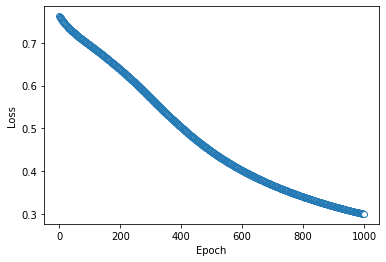

In [13]:
ANNclassify, loss_func, optimizer = createANNmodel(.01)

losses, predictions, totalacc = train(ANNclassify)

print(f"Final accuracy: {totalacc}%")

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

Learning Rate에 따라 acc는 어떻게 변화하는가?

In [14]:
learningrates = np.linspace(.001, .1, 50)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates), num_epochs))

for i, lr in enumerate(learningrates):
    # create and run the model
    ANNclassify, loss_func, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = train(ANNclassify)
    
    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

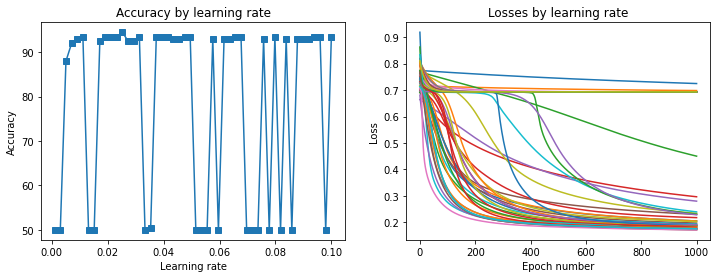

In [15]:
# plot the results
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T) # (1000, 40)
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')
plt.show()